In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('../data/merged/features.csv')

In [7]:
df

,speed,travel_time,data_as_of,link_points,hour_sin,hour_cos,minute_sin,minute_cos,day_sin,day_cos,...,factor1_Reaction to Uninvolved Vehicle,factor1_Steering Failure,factor1_Tire Failure/Inadequate,factor1_Traffic Control Disregarded,factor1_Turning Improperly,factor1_Unsafe Lane Changing,factor1_Unsafe Speed,factor1_Unspecified,factor1_View Obstructed/Limited,factor1_Windshield Inadequate
0,0.840670,0.063321,2021-05-23 00:00:00,"40.6665206,-73.76246 40.66738,-73.77021 40.667...",0.000000,1.000000,0.0,1.0,-0.781831,0.623490,...,False,False,False,False,False,False,False,False,False,False
1,0.900159,0.058658,2021-05-23 01:00:00,"40.6665206,-73.76246 40.66738,-73.77021 40.667...",0.258819,0.965926,0.0,1.0,-0.781831,0.623490,...,False,False,False,False,False,False,False,False,False,False
2,0.923604,0.057007,2021-05-23 02:00:00,"40.6665206,-73.76246 40.66738,-73.77021 40.667...",0.500000,0.866025,0.0,1.0,-0.781831,0.623490,...,False,False,False,False,False,False,False,False,False,False
3,0.927751,0.056842,2021-05-23 03:00:00,"40.6665206,-73.76246 40.66738,-73.77021 40.667...",0.707107,0.707107,0.0,1.0,-0.781831,0.623490,...,False,False,False,False,False,False,False,False,False,False
4,0.956300,0.054989,2021-05-23 04:00:00,"40.6665206,-73.76246 40.66738,-73.77021 40.667...",0.866025,0.500000,0.0,1.0,-0.781831,0.623490,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31521,0.589633,0.092616,2025-05-21 19:00:00,"40.6665206,-73.76246 40.66738,-73.77021 40.667...",-0.965926,0.258819,0.0,1.0,0.974928,-0.222521,...,False,False,False,False,False,False,False,False,False,False
31522,0.573046,0.095272,2025-05-21 20:00:00,"40.6665206,-73.76246 40.66738,-73.77021 40.667...",-0.866025,0.500000,0.0,1.0,0.974928,-0.222521,...,False,False,False,False,False,False,False,False,False,False
31523,0.577193,0.094383,2025-05-21 21:00:00,"40.6665206,-73.76246 40.66738,-73.77021 40.667...",-0.707107,0.707107,0.0,1.0,0.974928,-0.222521,...,False,False,False,False,False,False,False,False,False,False
31524,0.607815,0.089720,2025-05-21 22:00:00,"40.6665206,-73.76246 40.66738,-73.77021 40.667...",-0.500000,0.866025,0.0,1.0,0.974928,-0.222521,...,False,False,False,False,False,False,False,False,False,False


In [8]:
df.columns

Index(['speed', 'travel_time', 'data_as_of', 'link_points', 'hour_sin',
       'hour_cos', 'minute_sin', 'minute_cos', 'day_sin', 'day_cos',
       'week_num_sin', 'week_num_cos', 'month_sin', 'month_cos', 'is_holiday',
       'is_non_business_day', 'temp', 'feelslike', 'dew', 'humidity', 'precip',
       'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir', 'cloudcover',
       'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'hour',
       'icon_clear', 'icon_cloudy', 'icon_fog', 'icon_partly cloudy',
       'icon_rain', 'icon_snow', 'icon_wind', 'CRASH DATE', 'CRASH TIME',
       'BOROUGH', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'factor1_-1',
       'factor1_Aggressive Driving/Road Rage', 'factor1_Alcohol Involvement',
       'factor1_Animals Action', 'factor1_Backing Unsafely',
       'factor1_Brakes Defective', 'factor1_Cell Phone (hand-Held)',
       'factor1_Driver Inattention/Distract

**Eliminating Collisions Data**

In [31]:
df = df[['speed', 'travel_time', 'data_as_of', 'link_points', 'hour_sin',
       'hour_cos', 'minute_sin', 'minute_cos', 'day_sin', 'day_cos',
       'week_num_sin', 'week_num_cos', 'month_sin', 'month_cos', 'is_holiday',
       'is_non_business_day', 'temp', 'feelslike', 'dew', 'humidity', 'precip',
       'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir', 'cloudcover',
       'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'hour',
       'icon_clear', 'icon_cloudy', 'icon_fog', 'icon_partly cloudy',
       'icon_rain', 'icon_snow', 'icon_wind']]

**Returning Old Scales**

In [9]:
df['speed_original'] = df['speed'] * (63.01 - 0.31) + 0.31

In [10]:
df['travel_time_original'] = df['travel_time'] * (1040.92 - 5.25) + 5.25

In [11]:
df['speed_original']

0        53.02
1        56.75
2        58.22
3        58.48
4        60.27
         ...  
31521    37.28
31522    36.24
31523    36.50
31524    38.42
31525    40.90
Name: speed_original, Length: 31526, dtype: float64

In [12]:
df['travel_time_original']

0         70.83
1         66.00
2         64.29
3         64.12
4         62.20
          ...  
31521    101.17
31522    103.92
31523    103.00
31524     98.17
31525     91.83
Name: travel_time_original, Length: 31526, dtype: float64

In [13]:
df.isna().sum()

speed                              0
travel_time                        0
data_as_of                         0
link_points                        0
hour_sin                           0
                                  ..
factor1_Unspecified                0
factor1_View Obstructed/Limited    0
factor1_Windshield Inadequate      0
speed_original                     0
travel_time_original               0
Length: 89, dtype: int64

In [37]:
df = df.drop('windgust', axis = 1)

In [38]:
df.isna().sum()

,0
speed,0
travel_time,0
data_as_of,0
link_points,0
hour_sin,0
hour_cos,0
minute_sin,0
minute_cos,0
day_sin,0
day_cos,0


In [14]:
df.describe()

,speed,travel_time,hour_sin,hour_cos,minute_sin,minute_cos,day_sin,day_cos,week_num_sin,week_num_cos,...,icon_cloudy,icon_fog,icon_partly cloudy,icon_rain,icon_snow,icon_wind,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,speed_original,travel_time_original
count,31526.000000,31526.000000,31526.000000,3.152600e+04,31526.0,31526.0,31526.000000,31526.000000,31526.000000,31526.000000,...,31526.000000,31526.000000,31526.000000,31526.000000,31526.000000,31526.000000,31526.000000,31526.000000,31526.000000,31526.000000
mean,0.588399,0.108347,-0.002343,-2.514785e-03,0.0,1.0,0.004898,-0.003437,-0.009277,-0.016558,...,0.215758,0.002601,0.602867,0.100584,0.005361,0.000412,0.038349,0.000063,37.202587,117.461888
std,0.189941,0.061662,0.707066,7.071617e-01,0.0,0.0,0.707008,0.707203,0.726536,0.686890,...,0.411354,0.050935,0.489312,0.300781,0.073021,0.020303,0.280966,0.007965,11.909299,63.861969
min,0.000000,0.000000,-1.000000,-1.000000e+00,0.0,1.0,-0.974928,-0.900969,-0.999561,-0.998244,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.310000,5.250000
25%,0.459171,0.072494,-0.707107,-7.071068e-01,0.0,1.0,-0.781831,-0.900969,-0.737833,-0.717507,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.100000,80.330000
50%,0.608612,0.088667,0.000000,-1.836970e-16,0.0,1.0,0.000000,-0.222521,-0.059241,0.029633,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.470000,97.080000
75%,0.725040,0.122462,0.707107,7.071068e-01,0.0,1.0,0.781831,0.623490,0.737833,0.674983,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.770000,132.080000
max,1.000000,1.000000,1.000000,1.000000e+00,0.0,1.0,0.974928,1.000000,0.999561,0.992981,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,63.010000,1040.920000


**Sorting The Data**

In [15]:
df = df.sort_values('data_as_of').reset_index(drop=True)

**Detecting Outliers**

       speed_original  travel_time_original
count    31526.000000          31526.000000
mean        37.202587            117.461888
std         11.909299             63.861969
min          0.310000              5.250000
25%         29.100000             80.330000
50%         38.470000             97.080000
75%         45.770000            132.080000
max         63.010000           1040.920000


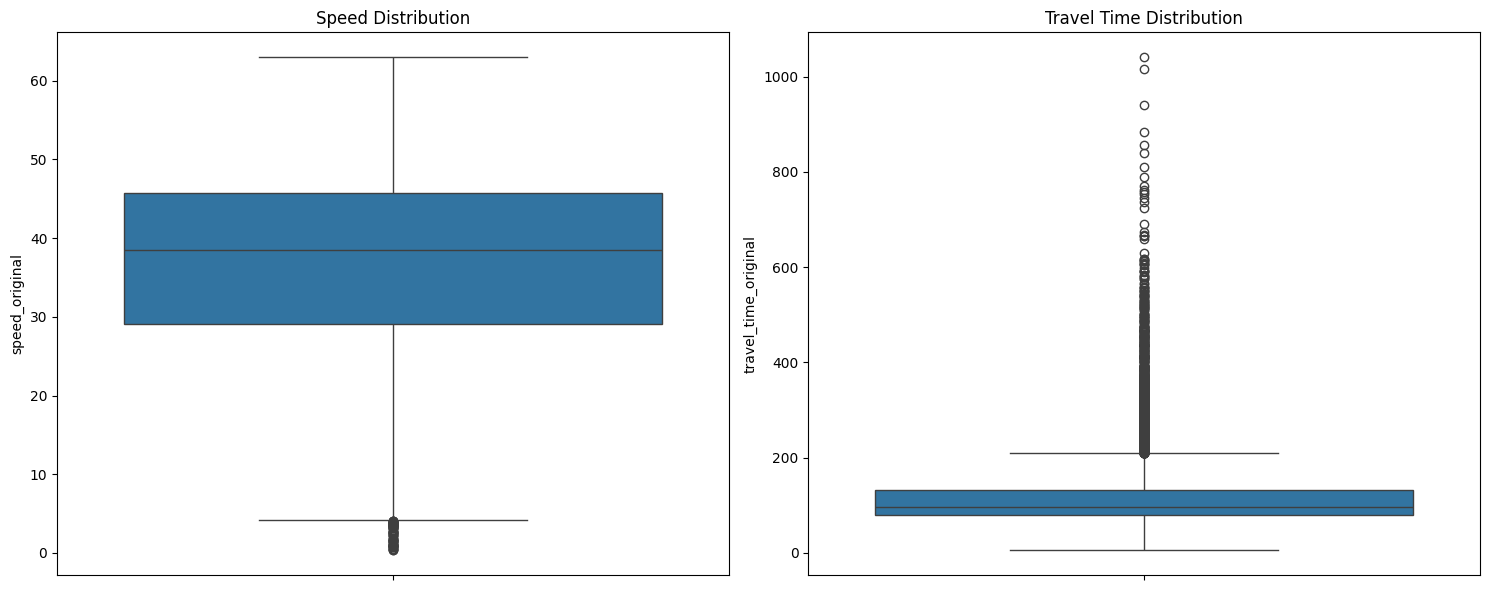

Potential speed outliers: 22 (0.07%)
Potential travel time outliers: 566 (1.80%)


In [16]:
traffic_data = df.copy()

print(traffic_data[['speed_original', 'travel_time_original']].describe())

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=traffic_data['speed_original'])
plt.title('Speed Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(y=traffic_data['travel_time_original'])
plt.title('Travel Time Distribution')
plt.tight_layout()
plt.show()

traffic_data['speed_zscore'] = np.abs((traffic_data['speed_original'] - traffic_data['speed_original'].mean()) / traffic_data['speed_original'].std())
traffic_data['travel_time_zscore'] = np.abs((traffic_data['travel_time_original'] - traffic_data['travel_time_original'].mean()) / traffic_data['travel_time_original'].std())

speed_outliers = traffic_data[traffic_data['speed_zscore'] > 3]
travel_time_outliers = traffic_data[traffic_data['travel_time_zscore'] > 3]

print(f"Potential speed outliers: {len(speed_outliers)} ({len(speed_outliers)/len(traffic_data)*100:.2f}%)")
print(f"Potential travel time outliers: {len(travel_time_outliers)} ({len(travel_time_outliers)/len(traffic_data)*100:.2f}%)")

**Handling Speed Outliers**

In [19]:
min_valid_speed = 0
max_valid_speed = 65

cleaned_traffic_data = traffic_data.copy()
cleaned_traffic_data.loc[cleaned_traffic_data['speed_original'] > max_valid_speed, 'speed_original'] = max_valid_speed

**Handling Time Outliers**

In [20]:
q1 = traffic_data['travel_time_original'].quantile(0.25)
q3 = traffic_data['travel_time_original'].quantile(0.75)
iqr = q3 - q1

upper_bound_moderate = q3 + 1.5 * iqr

upper_bound_extreme = q3 + 3 * iqr

print(f"Moderate outlier threshold (Q3 + 1.5*IQR): {upper_bound_moderate:.2f} minutes")
print(f"Extreme outlier threshold (Q3 + 3*IQR): {upper_bound_extreme:.2f} minutes")

cleaned_traffic_data.loc[cleaned_traffic_data['travel_time_original'] > upper_bound_extreme, 'travel_time_original'] = upper_bound_extreme

Moderate outlier threshold (Q3 + 1.5*IQR): 209.71 minutes
Extreme outlier threshold (Q3 + 3*IQR): 287.33 minutes


**Creating a Boxplot**

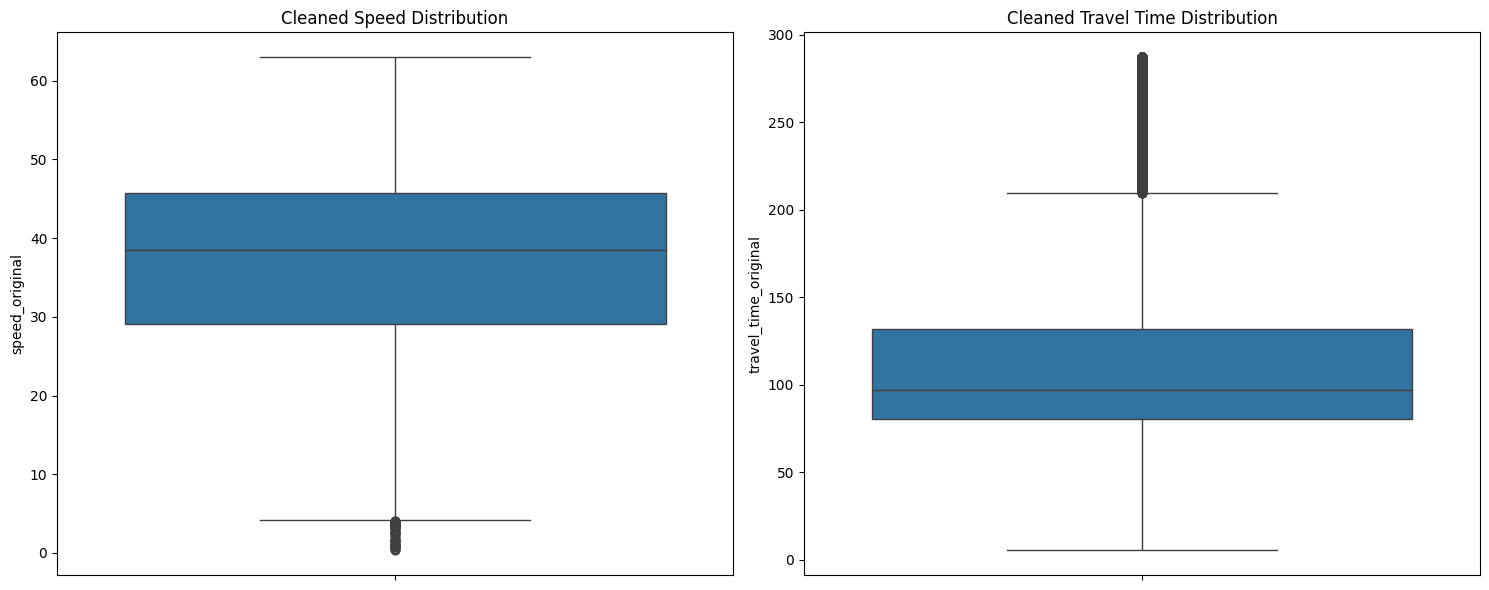

In [21]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=cleaned_traffic_data['speed_original'])
plt.title('Cleaned Speed Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(y=cleaned_traffic_data['travel_time_original'])
plt.title('Cleaned Travel Time Distribution')
plt.tight_layout()
plt.show()

**Creating Lag Features**

In [22]:
cleaned_traffic_data = cleaned_traffic_data.sort_values('data_as_of')

for lag in [1, 2, 3, 24, 168]:
    cleaned_traffic_data[f'speed_lag_{lag}h'] = cleaned_traffic_data['speed_original'].shift(lag)
    cleaned_traffic_data[f'travel_time_lag_{lag}h'] = cleaned_traffic_data['travel_time_original'].shift(lag)

**Creating Rolling Windows Features**

In [23]:
for window in [3, 6, 12]:
    cleaned_traffic_data[f'speed_rolling_mean_{window}h'] = cleaned_traffic_data['speed_original'].rolling(window=window).mean()
    cleaned_traffic_data[f'travel_time_rolling_mean_{window}h'] = cleaned_traffic_data['travel_time_original'].rolling(window=window).mean()

    cleaned_traffic_data[f'speed_rolling_std_{window}h'] = cleaned_traffic_data['speed_original'].rolling(window=window).std()
    cleaned_traffic_data[f'travel_time_rolling_std_{window}h'] = cleaned_traffic_data['travel_time_original'].rolling(window=window).std()

**Creating Speed Changes and Their Percentages**


In [24]:
cleaned_traffic_data['speed_change_1h'] = cleaned_traffic_data['speed_original'] - cleaned_traffic_data['speed_lag_1h']
cleaned_traffic_data['speed_change_3h'] = cleaned_traffic_data['speed_original'] - cleaned_traffic_data['speed_lag_3h']
cleaned_traffic_data['speed_change_24h'] = cleaned_traffic_data['speed_original'] - cleaned_traffic_data['speed_lag_24h']

cleaned_traffic_data['speed_pct_change_1h'] = (cleaned_traffic_data['speed_original'] / cleaned_traffic_data['speed_lag_1h'] - 1) * 100
cleaned_traffic_data['speed_pct_change_24h'] = (cleaned_traffic_data['speed_original'] / cleaned_traffic_data['speed_lag_24h'] - 1) * 100

**Creating Week-Over-Week Differentials**

In [25]:
cleaned_traffic_data['speed_vs_last_week'] = cleaned_traffic_data['speed_original'] - cleaned_traffic_data['speed_lag_168h']
cleaned_traffic_data['travel_time_vs_last_week'] = cleaned_traffic_data['travel_time_original'] - cleaned_traffic_data['travel_time_lag_168h']

In [26]:
cleaned_traffic_data.columns

Index(['speed', 'travel_time', 'data_as_of', 'link_points', 'hour_sin',
       'hour_cos', 'minute_sin', 'minute_cos', 'day_sin', 'day_cos',
       ...
       'travel_time_rolling_mean_12h', 'speed_rolling_std_12h',
       'travel_time_rolling_std_12h', 'speed_change_1h', 'speed_change_3h',
       'speed_change_24h', 'speed_pct_change_1h', 'speed_pct_change_24h',
       'speed_vs_last_week', 'travel_time_vs_last_week'],
      dtype='object', length=120)

**Detecting NULLs**

In [27]:
df_new = cleaned_traffic_data[['speed_lag_1h',
       'travel_time_lag_1h', 'speed_lag_2h', 'travel_time_lag_2h',
       'speed_lag_3h', 'travel_time_lag_3h', 'speed_lag_24h',
       'travel_time_lag_24h', 'speed_lag_168h', 'travel_time_lag_168h',
       'speed_rolling_mean_3h', 'travel_time_rolling_mean_3h',
       'speed_rolling_std_3h', 'travel_time_rolling_std_3h',
       'speed_rolling_mean_6h', 'travel_time_rolling_mean_6h',
       'speed_rolling_std_6h', 'travel_time_rolling_std_6h',
       'speed_rolling_mean_12h', 'travel_time_rolling_mean_12h',
       'speed_rolling_std_12h', 'travel_time_rolling_std_12h',
       'speed_change_1h', 'speed_change_3h', 'speed_change_24h',
       'speed_pct_change_1h', 'speed_pct_change_24h', 'speed_vs_last_week',
       'travel_time_vs_last_week']]

In [28]:
df_new.isna().sum()

speed_lag_1h                      1
travel_time_lag_1h                1
speed_lag_2h                      2
travel_time_lag_2h                2
speed_lag_3h                      3
travel_time_lag_3h                3
speed_lag_24h                    24
travel_time_lag_24h              24
speed_lag_168h                  168
travel_time_lag_168h            168
speed_rolling_mean_3h             2
travel_time_rolling_mean_3h       2
speed_rolling_std_3h              2
travel_time_rolling_std_3h        2
speed_rolling_mean_6h             5
travel_time_rolling_mean_6h       5
speed_rolling_std_6h              5
travel_time_rolling_std_6h        5
speed_rolling_mean_12h           11
travel_time_rolling_mean_12h     11
speed_rolling_std_12h            11
travel_time_rolling_std_12h      11
speed_change_1h                   1
speed_change_3h                   3
speed_change_24h                 24
speed_pct_change_1h               1
speed_pct_change_24h             24
speed_vs_last_week          

**Dropping The First Week To Handle All NULLs**

In [29]:
first_complete_index = 168
complete_data = cleaned_traffic_data.iloc[first_complete_index:].copy()

print(f"Original data shape: {cleaned_traffic_data.shape}")
print(f"Complete data shape: {complete_data.shape}")

remaining_nulls = complete_data.isna().sum().sum()
print(f"Remaining null values: {remaining_nulls}")

complete_data['speed'] = complete_data['speed_original']
complete_data['travel_time'] = complete_data['travel_time_original']
complete_data = complete_data.drop(['speed_original', 'travel_time_original'], axis = 1)

Original data shape: (31526, 120)
Complete data shape: (31358, 120)
Remaining null values: 33759


In [30]:
complete_data.columns

Index(['speed', 'travel_time', 'data_as_of', 'link_points', 'hour_sin',
       'hour_cos', 'minute_sin', 'minute_cos', 'day_sin', 'day_cos',
       ...
       'travel_time_rolling_mean_12h', 'speed_rolling_std_12h',
       'travel_time_rolling_std_12h', 'speed_change_1h', 'speed_change_3h',
       'speed_change_24h', 'speed_pct_change_1h', 'speed_pct_change_24h',
       'speed_vs_last_week', 'travel_time_vs_last_week'],
      dtype='object', length=118)

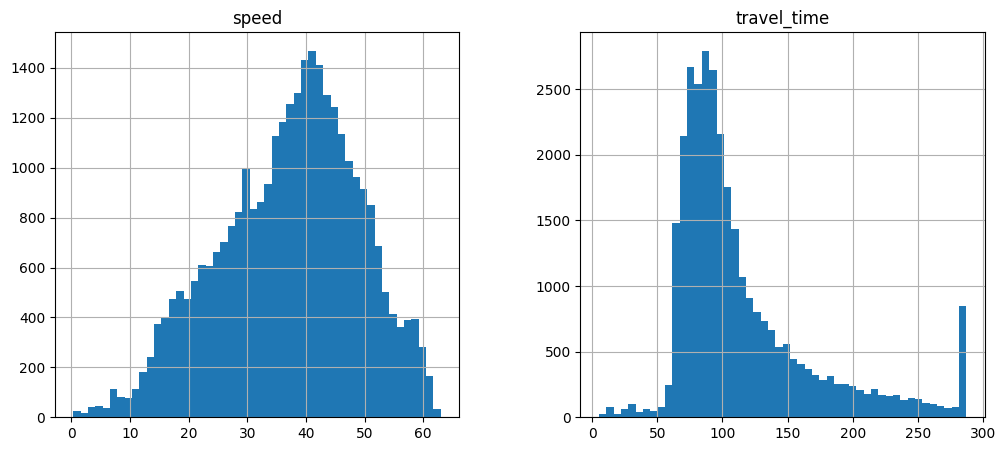

In [32]:
complete_data[['speed', 'travel_time']].hist(bins=50, figsize=(12, 5))
plt.show()

In [ ]:
# reduce the spahrpen 

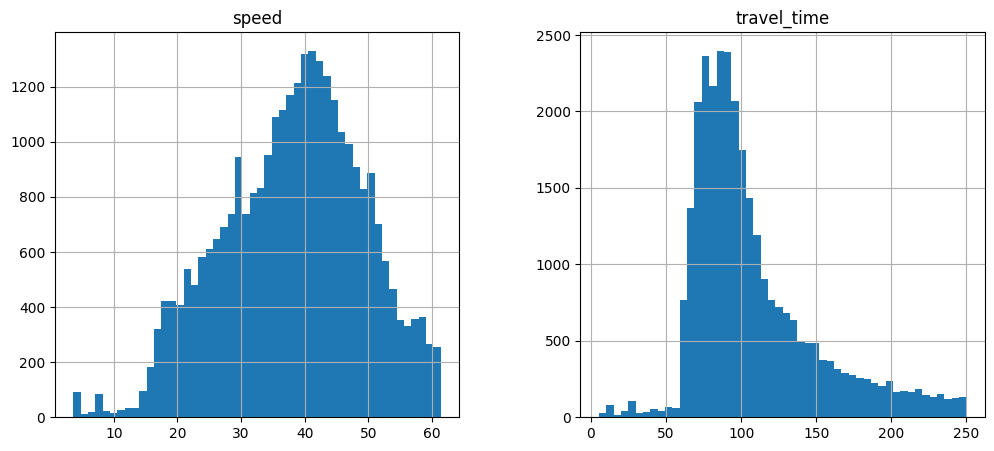

In [33]:
speed_lower = complete_data['speed'].quantile(0.002)
speed_upper = complete_data['speed'].quantile(0.998)
complete_data = complete_data[complete_data['travel_time'] <= 250]
# Clip gently
complete_data['speed'] = complete_data['speed'].clip(lower=speed_lower, upper=speed_upper)
complete_data[['speed', 'travel_time']].hist(bins=50, figsize=(12, 5))
plt.show()

In [36]:
complete_data.to_csv('../data/merged/Data.csv', index = False)